In [21]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
%matplotlib inline 

## Pin Points 
1) The dataset is very large just take sample of it lets take 10% only <br />
2) all features are important

In [22]:
data = pd.read_csv("creditcard.csv")

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
data = data.sample(frac=0.1,random_state=42)

Text(0, 0.5, 'Amount')

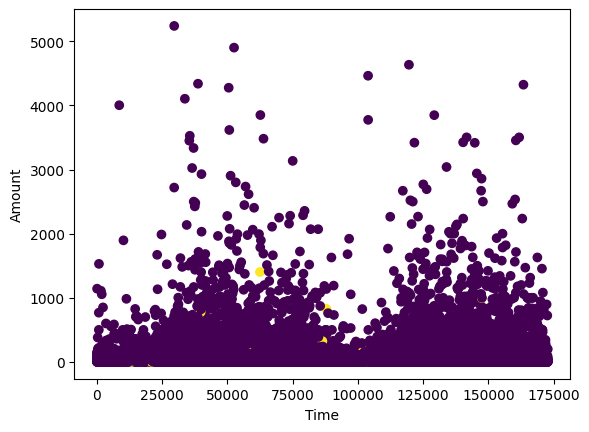

In [25]:
plt.scatter(data["Time"],data["Amount"],c=data['Class'])
plt.xlabel("Time")
plt.ylabel("Amount")

In [26]:
data['Class'].value_counts()

Class
0    28435
1       46
Name: count, dtype: int64

In [27]:
x  = data.drop(columns=["Class"],axis=1)
y = data['Class']

In [28]:
x.shape

(28481, 30)

In [29]:
model = IsolationForest(contamination='auto')


In [30]:
model.fit(x)

IsolationForest()

In [31]:
predictions = model.predict(x)

In [32]:
predictions[predictions == 1] = 0 # 1 is normal data points 
predictions[predictions == -1] = 1 # -1 is fraud / outliers 

In [33]:
accuracy_score(y,predictions)

0.9631684280748569

In [34]:
n_errors = (predictions != y).sum()

In [35]:
n_errors

1049